In [ ]:
import pyaudio #Necessary to crunch audio data. More files are necessary to compile data
import wave #can load the wave file
import numpy as np
import struct
import matplotlib.pyplot as plt

#Length of data to be read
CHUNK = 1024 

#Local File is read
wf = wave.open('Song.wav', 'rb')

# instantiate PyAudio object
p = pyaudio.PyAudio()

# open stream. We get the songs default values
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

fig, ax = plt.subplots()

# read data
data = wf.readframes(CHUNK)
data_repo = []
# play stream (3)
while len(data) > 0:
    stream.write(data) #Just like this This will play the song
    
    #Get the data from the audio chunk. this is in binary
    data = wf.readframes(CHUNK) 
    #Convert data from binary to numbers. We then slice the data to prevent erratic data. +255 is a pretty constant
    data_int = np.array(struct.unpack(str(4*CHUNK) + 'B', data), dtype = 'b')[::2] + 255 
    
    #Storing the data the into an array for later use. WARNING currently, this storange takes the whole song to complete
    data_repo.append(data_int)
    
    #We can plot the data_int directly
    #ax.plot(data_int)
    #This gives time to plot. But the result is a overwritten image with a buffered song
    #plt.pause(0.05) 
    

# stop stream (4)
stream.stop_stream()
stream.close()

# close PyAudio (5)
p.terminate()

In [ ]:
#Saving any SongData into a pickle file
import pickle
pickle.dump( data_repo, open( "songData.p", "wb" ) )

In [ ]:
#Loading any SongData pickle file into a 
import pickle
infile = open("SongData.p",'rb')
data_repo = pickle.load(infile)
infile.close()
#The Data_repo is an array of data. Each index of the repo is an array of values
#print(data_repo[0])

In [ ]:
#Graphing the SongData the data_repo. TODO make this iterative with a nice plot refresh
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#print(data_repo[0])   
#Plotting a single data array
ax.plot(data_repo[555])

In [5]:
#Creating an amplitude graph with a given song

import scipy.io.wavfile 

#This gives data about the song. It has the information for both amplitude and frequency but needs FFT
rate,audData=scipy.io.wavfile.read('Song.wav')
#Lenght of the Song
audData.shape[0] / rate
#wav number of channels mono/stereo
audData.shape[1]
#if stereo grab both channels
channel1=audData[:,0] #left
channel2=audData[:,1] #right

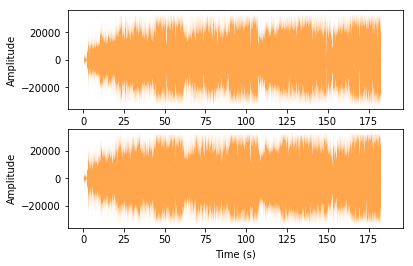

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#WARNING DATA IS MANIPULATION IS SLOW

#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1) / rate

#plot amplitude (or loudness) over time
plt.figure(1)
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, channel2, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

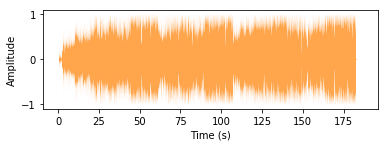

In [7]:
#Reducing the Channel to a chain from -1 to 1
channel1 = channel1/np.max(channel1)
plt.figure(1)
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
from numpy import fft as fft
#VERY SLOW
#FFT IS VERY COMPLEX BUT THIS CAN FIND FREQUENCY
fourier=fft.fft(channel1)
plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')



In [ ]:
import math
n = len(channel1)
fourier = fourier[0:math.floor(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);

plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')